In [1]:
from ipywidgets import interactive, IntSlider, FloatSlider
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import bitlib as bit

plt.xkcd()  # Yes...
plt.show()

## Secants
---

A straight line that intersects a curve at two points $A$ and $B$ is called a __secant__ of this curve (of course the straight line can intersect the curve more than twice).

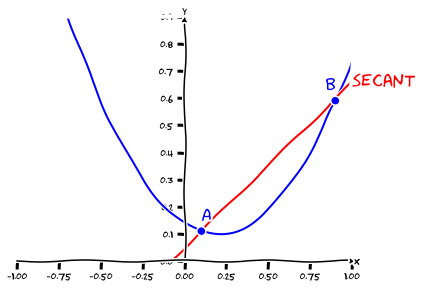

In [2]:
plt.rcParams["figure.figsize"] = (6, 4.5)
fig, ax = plt.subplots(1, 1) #ax is 2x2 matrix

def pow(x):
    return np.power(x-0.2,2)+0.1

def powPrime(x):
    return 2*(x-0.2)


def g(ax):
    #plot graph "pow"
    x = np.linspace(-1,1, num = 100)
    ax.plot(x, pow(x), 'blue')
    ax.set_ylim((0,0.9))
    ax.set_xlim((-1,1)) 
    bit.formatAxes(ax)
    bit.formatAxes(ax)
    
    #plot secant through A and B
    Ax = 0.1
    Ay = pow(Ax)
    Bx = 0.9
    By = pow(Bx)
    x = np.linspace(-0.1,1.4, num = 2)
    ax.plot(x,(By-Ay)/(Bx-Ay)*x+0.05,'-', color='red')
    ax.text(1,0.65,'secant', color='red', size = 18)
    ax.plot(Ax,Ay, 'bo')
    ax.text(Ax,Ay+0.05,'A', color='blue', size = 18)
    ax.plot(Bx,By, 'bo')
    ax.text(Bx-0.06,By+0.05,'B', color='blue', size = 18)
    
    
    #plot tangent
    #al = powPrime(0.6)
    #b = pow(0.6)-al*0.6
    #x = np.linspace(-1,1, num = 2)
    #ax.plot(x,al*x+b,'b', linestyle="--")
    
    #ax.plot(0.6,pow(0.6), 'bo')
    #ax.text(0.4,1.05*pow(0.6),'A', color='blue', size = 18)
    #ax.text(1.05,1.05*pow(0.6),'tangent', color='blue', size = 18)
    
    #plot secant
    
    
g(ax)

If we know the coordinates of the points $A$ and $B$, it is straight forward to find the equation of the secant. Let us find the slope of the secant above. To do so, we need to know more about the problem:

1. the functional equation of the blue curve is $f(x)=(x-0.2)^2+0.1$ 

2. the $x$-coordinate of $A$ is $A_x = 0.1$

3. the $x$-coordinate of $B$ is $B_x = 0.9$



- the slope is given by 

  $$\nonumber a = \frac{\Delta x}{\Delta y}=\frac{B_y-A_y}{B_x-A_x} = \frac{9-4}{3-1}=2.5$$
  
  Thus we have $s(x)=2.5 x+b$. 
  
- to find the $y$-intercept $b$, we use the fact that $f(A_x)=A_y$ (or that $f(B_x)=B_y$) and we get 

  $$\nonumber f(1)=4 \rightarrow 2.5\cdot 1+b = 4 \rightarrow b=4-2.5=1.5$$
  
  Thus, the equation is $f(x)=2.5 x-1.5$.



Secants are useful for _approximating_ the slope of a tangent.  

### Exercise
---
Consider the graph of the function $f(x)=\sqrt{x}$. Point $A(2\vert \sqrt{2})$ is on the graph. Determine, to a good precision, the slope of the tangent to the graph at $A$. 

Hint:  

### Solution
---
You can give a an estimate of the slope of the tangent by determining the slope of the straight line that passes through the points $A$ and $B$ on the graph (a so called _secant_ of the graph). The closer $B$ is to $A$, the more parallel are the secant and the tangent, and the better is the estimate of the slope of the tangent. But note that with this method it is quite difficult to find the precise slope of the tangent. All we can do is finding better and better approximations, but these are still approximations (see graphs below)

   Let us calculate the slope of the secant for $B$ with $x$-coordinate $1$. Thus, we have $B(1\vert f(1)) = B(1\vert 1)$. We choose
   
   $$\nonumber \Delta y = y_B-y_A = 1-\sqrt{2}$$ 
   
   $$\nonumber \Delta x = x_B-x_A = 1-2=-1$$
   
   and thus the slope is
   
   $$\nonumber \frac{\Delta y}{\Delta x} = \frac{y_B-y_A}{x_B-x_A} = \frac{1-\sqrt{2}}{-1}=\sqrt{2}-1 = 0.4142...$$

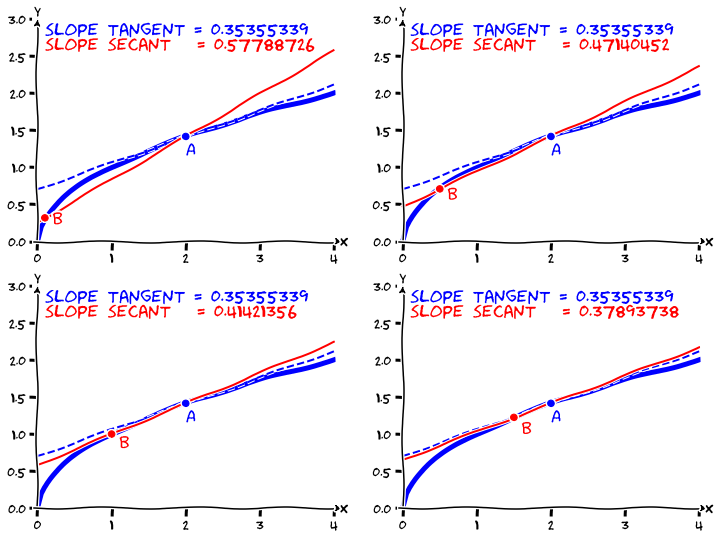

In [4]:
plt.rcParams["figure.figsize"] = (12, 9)
fig, ax = plt.subplots(2, 2) #ax is 2x2 matrix

def f(x2, ax):
    x1=2
    A=[x1,np.sqrt(x1)]
    B=[x2,np.sqrt(x2)]
    
    al_sec = (B[1]-A[1])/(B[0]-A[0])
    b_sec = A[1]-al_sec*A[0]
    al_tan = 0.5*1/np.sqrt(x1)
    b_tan = A[1]-al_tan*A[0]
                                 
    x_f = np.linspace(0,4, num=100)
    x_sec = np.linspace(0,4, num=2)
    x_tan = np.linspace(0,4, num=2)

    ax.axis('equal')
    ax.set_ylim((0,3))
    ax.set_xlim((0,4)) 
    bit.formatAxes(ax)
    
    #plot root function
    ax.plot(x_f,np.sqrt(x_f),'blue', linewidth=5)
    
    #plot tangent
    ax.plot(x_tan,al_tan*x_tan+b_tan,'blue', linestyle="--")
    
    #plot secant          
    ax.plot(x_sec,al_sec*x_sec+b_sec,'red')
    
    
    #plot points
    ax.plot(A[0],A[1],'bo')
    ax.plot(B[0],B[1],'ro')

    ax.text(A[0],0.85*A[1],'A', color='blue', size=18)
    ax.text(B[0]+0.1,0.85*B[1],'B',  color='red', size=18)

    ax.text(0.1,2.6,f'slope secant   = {str(round(al_sec,8))}', color='red', size = 18)
    ax.text(0.1,2.8,f'slope tangent = {str(round(al_tan,8))}', color='blue', size = 18)
    

#widget = interactive(f, x2=FloatSlider(min=0, max=1.99, step=0.05, continuous_update=False))
#display(widget)
f(0.1,ax[0,0])
f(0.5,ax[0,1])
f(1.0,ax[1,0])
f(1.5,ax[1,1])


In [1]:
#needs to be in the last cell for css styling
from IPython.core.display import HTML
def css_styling():
    styles = open("../../assets/custom/custom.css", "r").read()
    return HTML(styles)
css_styling()